In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# TensorFlow / Keras Imports
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, LSTM, Bidirectional,
    TimeDistributed, Dense, Flatten, Dropout, BatchNormalization, Reshape
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-03-16 15:22:35.708235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742131355.750569   94012 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742131355.762845   94012 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 15:22:35.854283: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df["ts"] = pd.to_datetime(df["ts"], errors="coerce")
df.set_index("ts", inplace=True)  # Set timestamp as index

In [4]:
df = df[(df.index < "2026-01-01") & (df.index > "2024-01-01")]


In [7]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
ts,,,,,,,,,,
2024-05-22 14:34:01,592,29,10.30,9.0,352,148,974,623,24.0,47.2
2024-05-22 14:35:00,592,29,10.31,10.1,304,136,974,616,23.6,46.8
2024-05-22 14:36:03,592,29,4.08,9.9,284,117,974,603,23.5,47.8
2024-05-22 14:37:01,592,29,7.86,9.6,266,114,323,599,23.3,47.1
2024-05-22 14:38:00,592,29,6.84,8.4,260,116,307,601,23.0,47.1


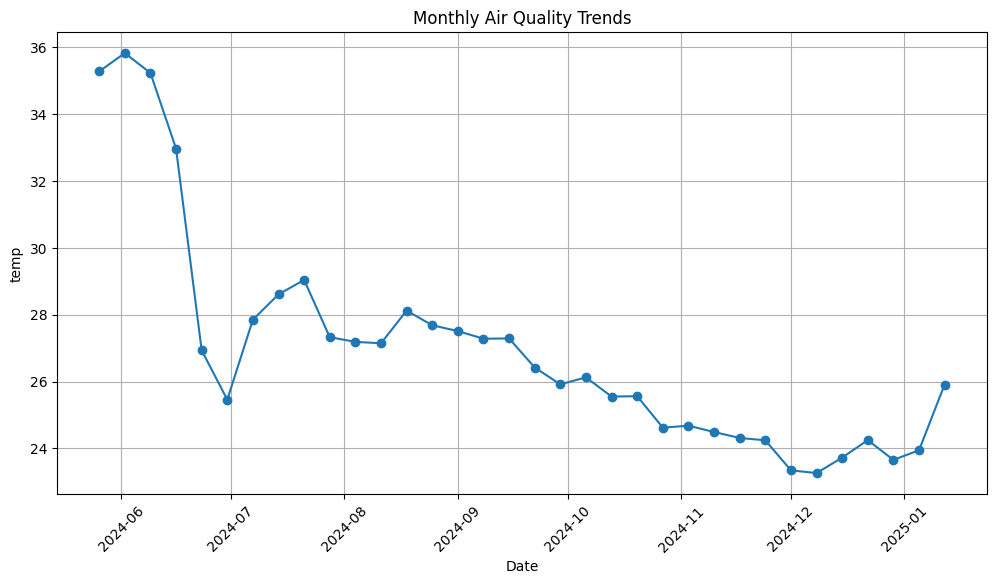

In [8]:
df_resampled = df.resample("W").mean()  # Change "W" to "M" for monthly

plt.figure(figsize=(12, 6))  
plt.plot(df_resampled.index, df_resampled["Temp"], marker="o", linestyle="-")  
plt.xlabel("Date")  
plt.ylabel("temp")  
plt.title("Monthly Air Quality Trends")  
plt.xticks(rotation=45)  
plt.grid()  
plt.show()  

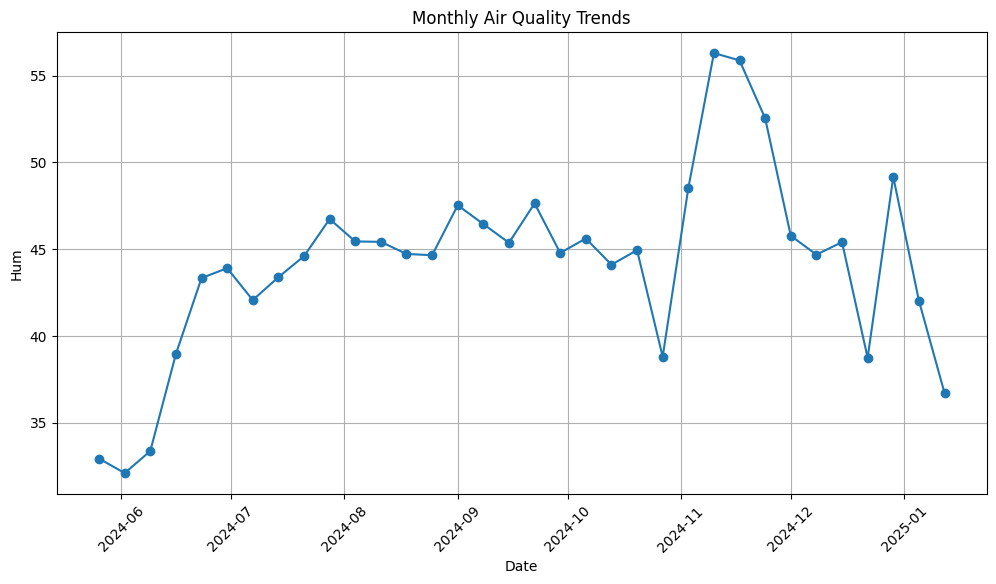

In [9]:
df_resampled = df.resample("W").mean()  # Change "W" to "M" for monthly

plt.figure(figsize=(12, 6))  
plt.plot(df_resampled.index, df_resampled["Hum"], marker="o", linestyle="-")  
plt.xlabel("Date")  
plt.ylabel("Hum")  
plt.title("Monthly Air Quality Trends")  
plt.xticks(rotation=45)  
plt.grid()  
plt.show()  